In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)

Reading CSV and setting timeseries as index.

In [262]:
df=pd.read_csv('../data/df_cleaned.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index("datetime",inplace=True)

,stat_id,unit,scp,station,linename,entries_abs,exits_abs
datetime,,,,,,,
2022-10-01 00:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,92,474
2022-10-01 04:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,19,199
2022-10-01 08:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,10,167
2022-10-01 12:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,55,380
2022-10-01 16:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,91,580
...,...,...,...,...,...,...,...
2022-10-07 05:00:00,ZEREGA AV 00-05-01 R419,R326,00-05-01,ZEREGA AV,6,0,0
2022-10-07 09:00:00,ZEREGA AV 00-05-01 R419,R326,00-05-01,ZEREGA AV,6,0,0
2022-10-07 13:00:00,ZEREGA AV 00-05-01 R419,R326,00-05-01,ZEREGA AV,6,0,0


Method to plot dataframes

In [280]:
def plot_eda(df,title,save,ylabe="Station"):
    # Initialize the matplotlib figure   
    f, ax = plt.subplots(figsize=(6, 15))
    f.tight_layout()
    # Plot
    kwargs = {'alpha':0.85}
    sns.set_color_codes("pastel")
    sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
    sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
    ax.set_title(title,fontsize=16)
    ax.set_xlabel('Passengers', fontsize = 16)
    ax.set_ylabel(ylabe, fontsize = 16)
    ax.legend(fontsize = 16)
    # plt.subplots_adjust(bottom=0.15,left=0.3,right=3)

    plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")
    return f,ax;


Getting top and bottom ten station by passengers amount.

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top stations by entries'}, xlabel='Passengers', ylabel='Station'>)

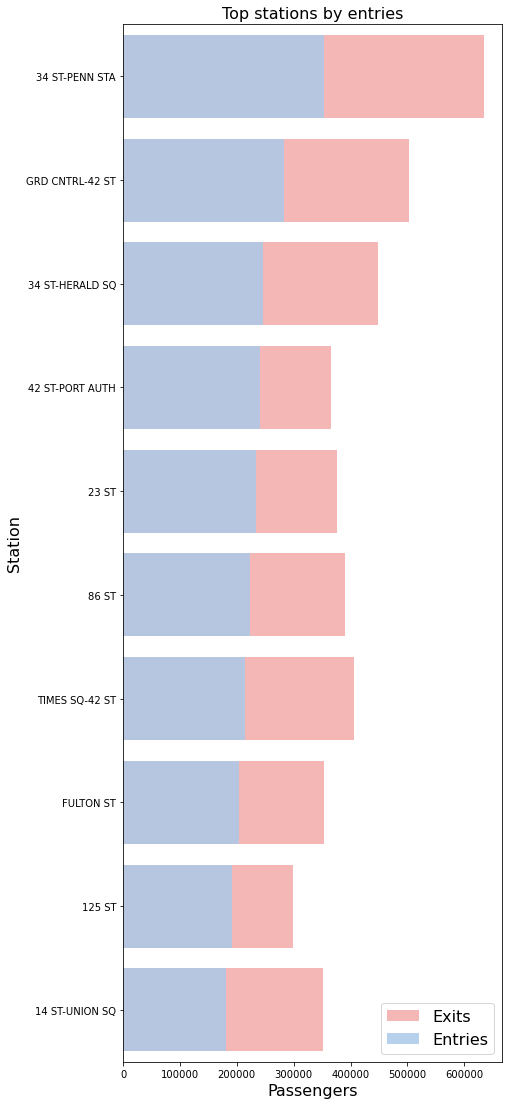

In [281]:
entries_top=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_top,"Top stations by entries","entries_top")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom stations by entries'}, xlabel='Passengers', ylabel='Station'>)

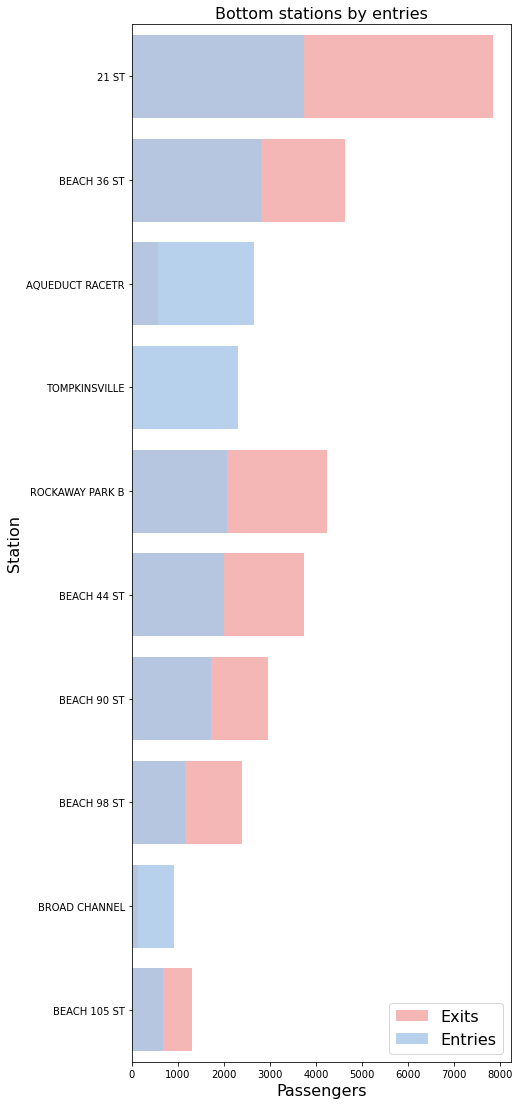

In [265]:
entries_bottom=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).tail(10)
plot_eda(entries_bottom,"Bottom stations by entries","entries_bottom")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top stations by exits'}, xlabel='Passengers', ylabel='Station'>)

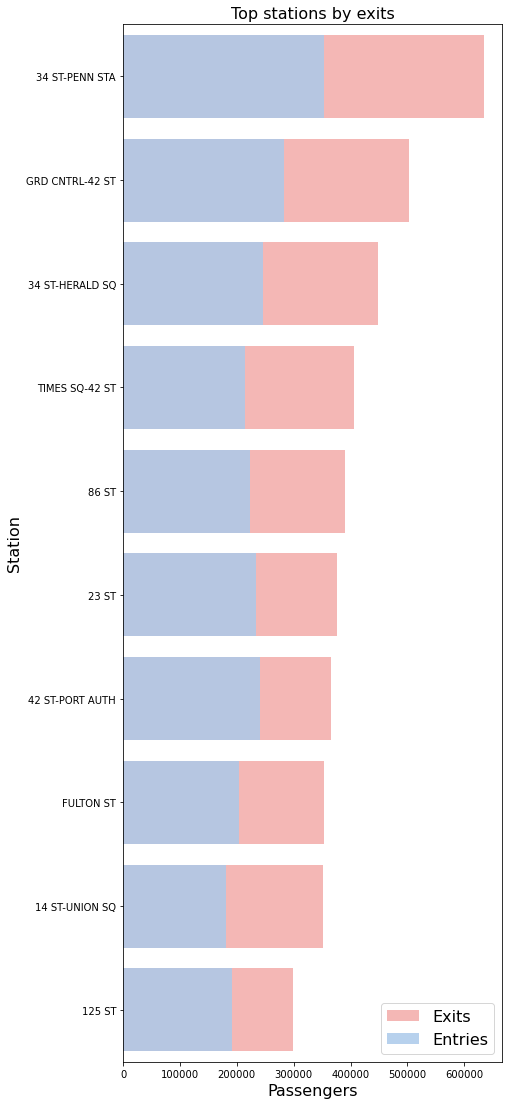

In [266]:
exits_top=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_top,"Top stations by exits","exits_top")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom stations by exits'}, xlabel='Passengers', ylabel='Station'>)

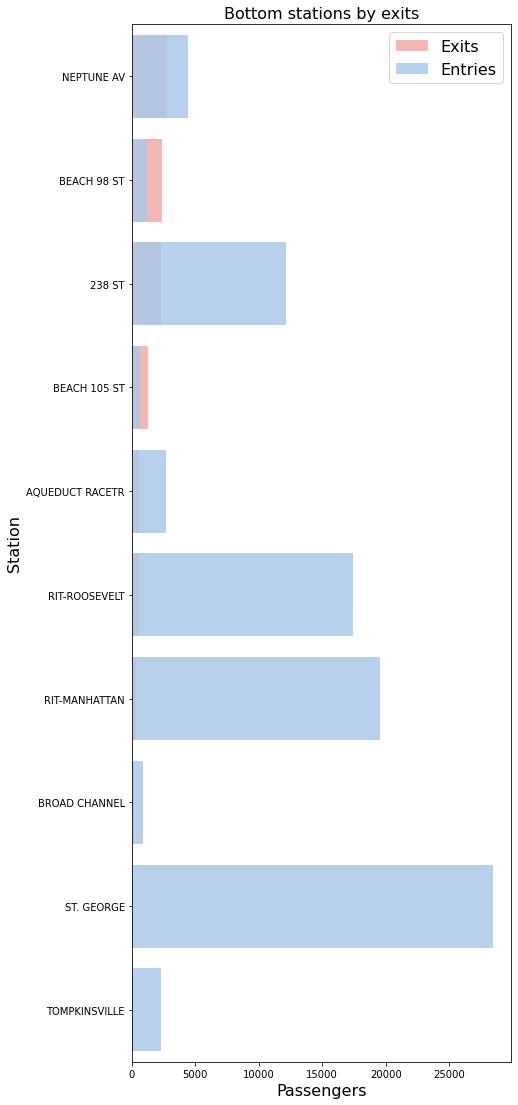

In [267]:
exits_bottom=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).tail(10)

plot_eda(exits_bottom,"Bottom stations by exits","exits_bottom")

In [268]:
df[df["station"]=="TOMPKINSVILLE"].head()

,stat_id,unit,scp,station,linename,entries_abs,exits_abs
datetime,,,,,,,
2022-10-01 02:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,7,0
2022-10-01 06:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,2,0
2022-10-01 10:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,23,0
2022-10-01 14:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,3,0
2022-10-01 18:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,10,0


Mean amount of people per line daily.

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top line per entries'}, xlabel='Passengers', ylabel='Station'>)

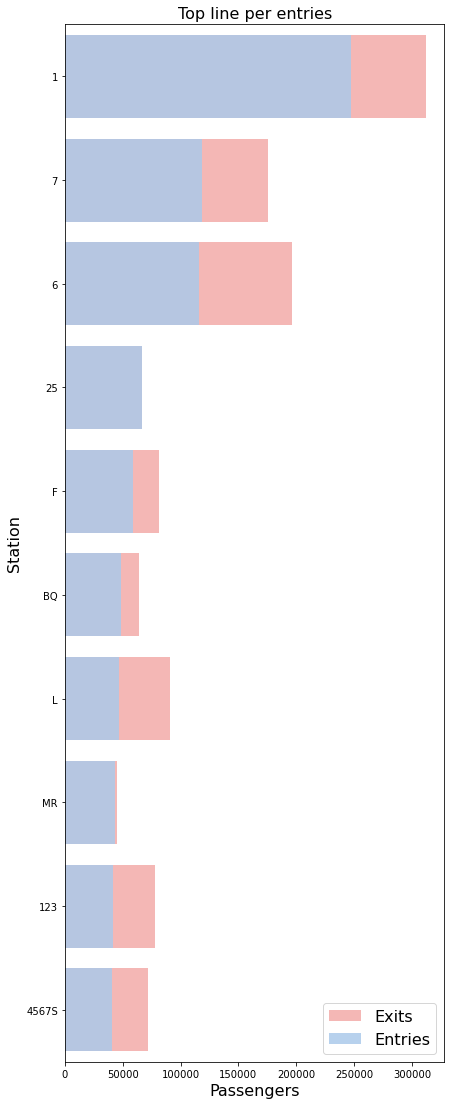

In [269]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_line,"Top line per entries","line_top")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom line per entries'}, xlabel='Passengers', ylabel='Station'>)

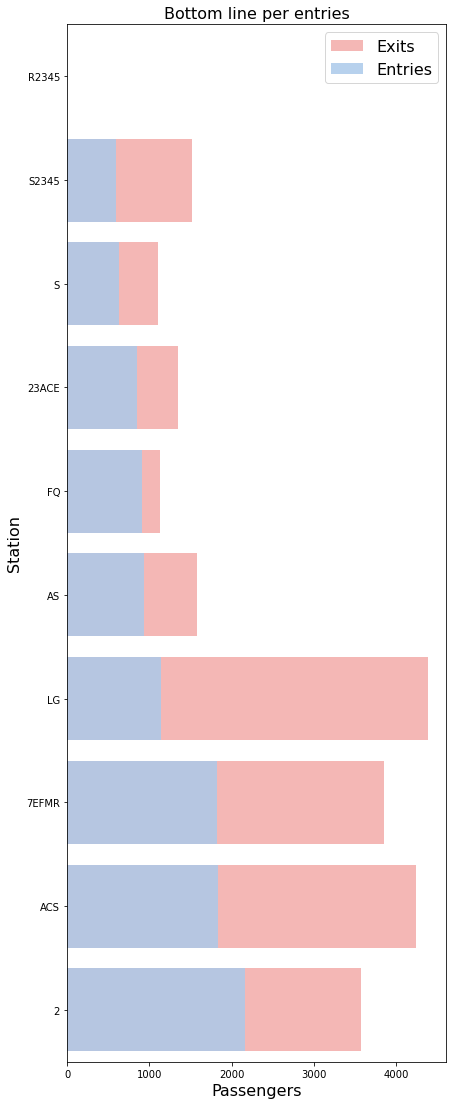

In [270]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=True).head(10)
plot_eda(entries_line,"Bottom line per entries","line_bottom")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom line per exits'}, xlabel='Passengers', ylabel='Station'>)

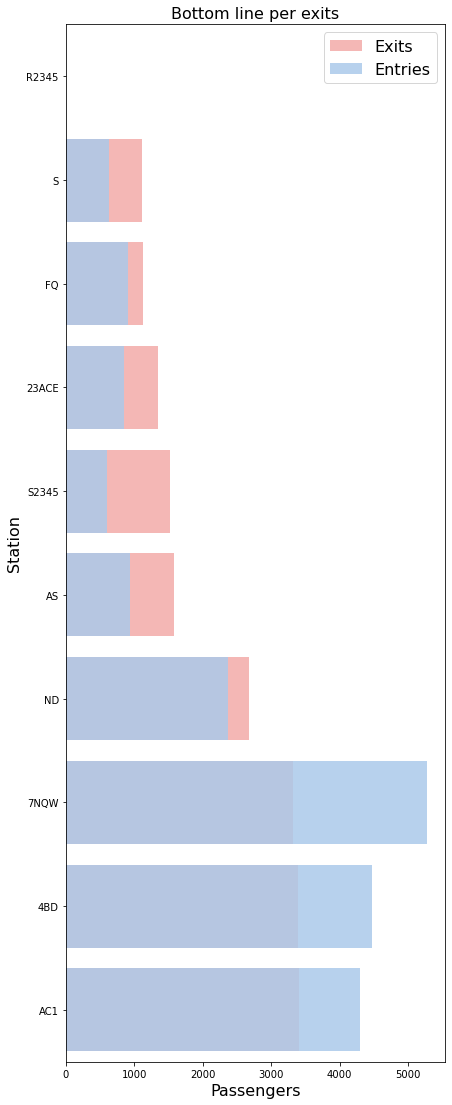

In [271]:
exits_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=True).head(10)
plot_eda(exits_line,"Bottom line per exits","line_bottom_exits")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top line per exits'}, xlabel='Passengers', ylabel='Station'>)

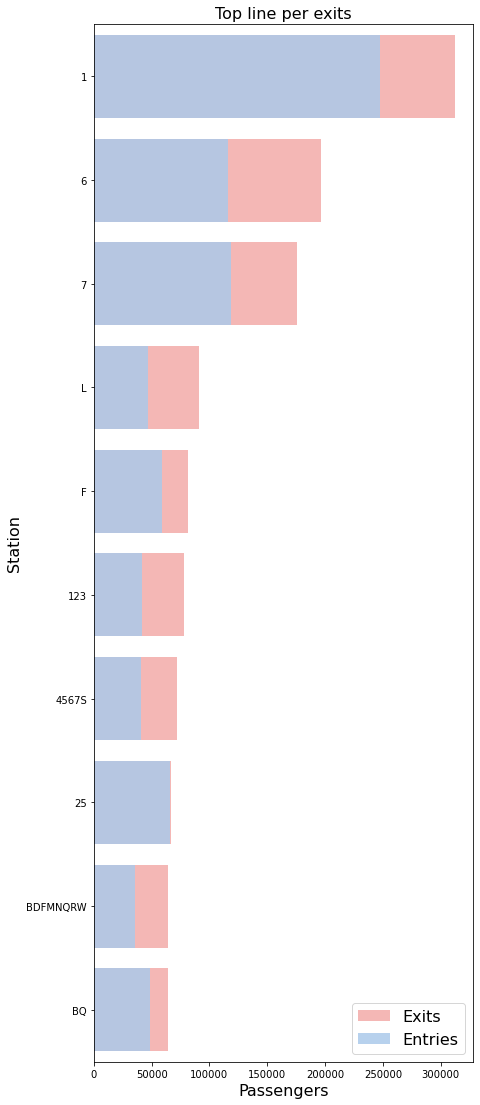

In [272]:
exits_line_top=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_line_top,"Top line per exits","line_top_exits")

Amount of people per day for the whole subway

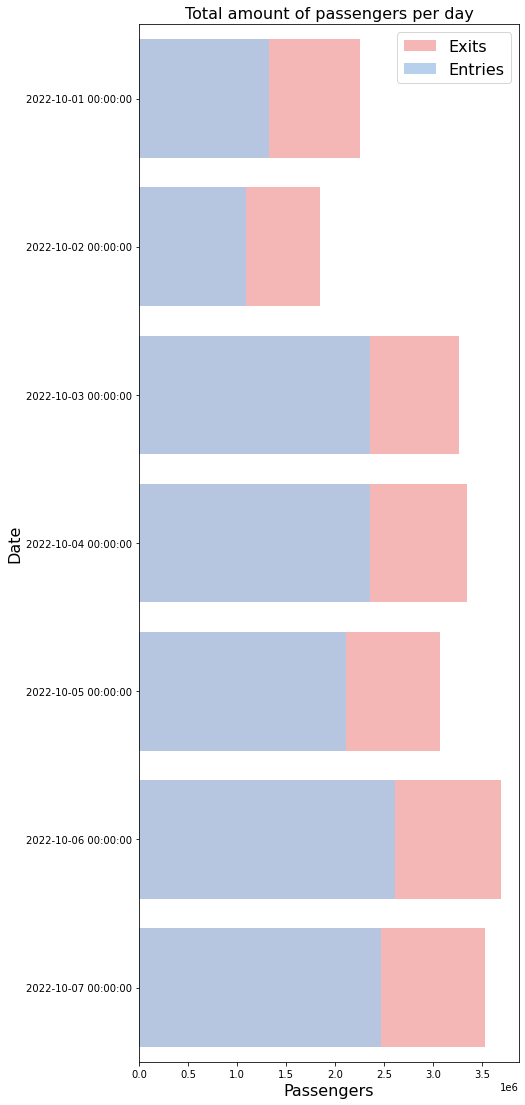

In [282]:

plot_eda(df.resample("D").sum().sort_index(),"Total amount of passengers per day","subway_amount","Date");
